In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [149]:
radio=(25/2)/100
resistencia=1.75*1000
B0=0.05
f=7
omega=3.5
t=np.linspace(0,3.6,1000)

In [150]:
def flujo_magnetico(t):
    return np.pi*(radio**2)*B0*np.cos(omega*t)*np.cos(2*np.pi*f*t)

In [151]:
def derivada_central(f,t):
    h=1e-8
    return (f(t+h)-f(t-h))/(2*h)
    

In [152]:
def corriente_inducidad(t):
    return (-1/resistencia)*derivada_central(flujo_magnetico,t)

In [153]:
corriente=(corriente_inducida(t))

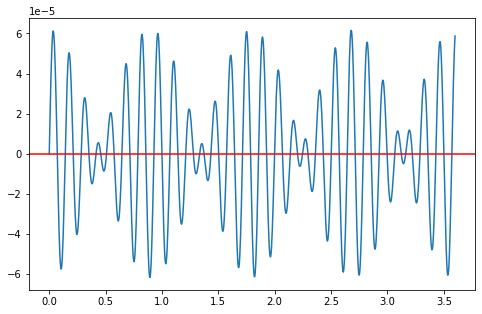

In [154]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(t,corriente)
plt.axhline(y = 0,color='r')
plt.show()

In [155]:
def GetNewtonMethod(f,df,xn,itmax=100,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error > precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn)
            # Criterio de parada
            error = np.abs(f(xn)/df(f,xn))
            
        except ZeroDivisionError:
            print('Division por cero')
            
        xn = xn1
        it += 1
        
   # print('Raiz',xn,it)
    
    if it == itmax:
        return False
    else:
        return xn

In [158]:
def GetAllRoots(x, tolerancia=10):
    
    Roots = np.array([])
    i=0
    for i in x:
    
        root = GetNewtonMethod(corriente_inducida,derivada_central,i)
        
        if type(root)!=bool:
            
            croot = np.round(root, tolerancia)
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
        i+=1
                
    Roots.sort()
    
    return Roots

In [159]:
t2=np.linspace(0,0.28)
Raices=GetAllRoots(t2)[4:7]
Raices

array([0.07096974, 0.14187736, 0.21262271])